In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

import warnings
# Code was showing some warnings, from stack overflow optimal answer was to include this
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df= pd.read_csv("fetal_health.csv")

In [3]:
df.shape

(2126, 22)

In [4]:
X = df.iloc[:, :-1]  
y = df.iloc[:, -1]   


## Before Normalization

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
knn_before = KNeighborsClassifier(n_neighbors=4)
knn_before.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=4)

In [7]:
y_pred = knn_before.predict(X_test)


In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Calculating using average micro
print("Accuracy = ", accuracy_score(y_test, y_pred) * 100, "%")
print("Precision = ", precision_score(y_test, y_pred,average='micro'))
print("Recall = ", recall_score(y_test, y_pred,average='micro'))
print("F1-score = ", f1_score(y_test, y_pred,average='micro'))
print("Confusion Matrix = ")
print(confusion_matrix(y_test, y_pred))
print ("********")
# Using classification report too
print("Classification Report")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


Accuracy =  88.02816901408451 %
Precision =  0.8802816901408451
Recall =  0.8802816901408451
F1-score =  0.8802816901408451
Confusion Matrix = 
[[321  11   1]
 [ 29  35   0]
 [  4   6  19]]
********
Classification Report
              precision    recall  f1-score   support

         1.0       0.91      0.96      0.93       333
         2.0       0.67      0.55      0.60        64
         3.0       0.95      0.66      0.78        29

    accuracy                           0.88       426
   macro avg       0.84      0.72      0.77       426
weighted avg       0.87      0.88      0.87       426



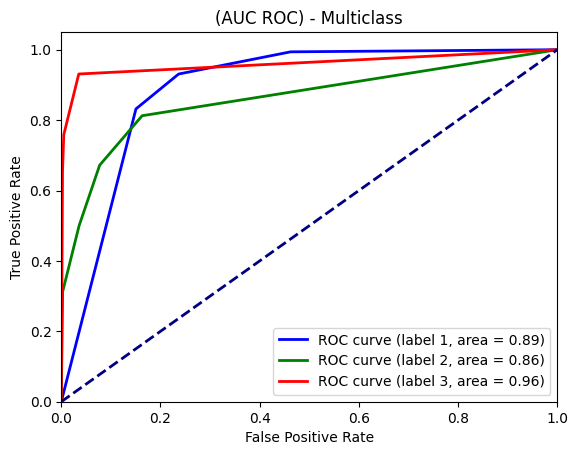

In [9]:
# For multiclass

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_scores = knn_before.predict_proba(X_test)

y_test_binarized = label_binarize(y_test, classes=[1, 2, 3])

plt.figure()

n_classes = 3
colors = ['b', 'g', 'r']

for i in range(1, n_classes + 1):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i - 1], y_scores[:, i - 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i - 1], lw=2, label=f'ROC curve (label {i}, area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(AUC ROC) - Multiclass')
plt.legend(loc="lower right")
plt.show()


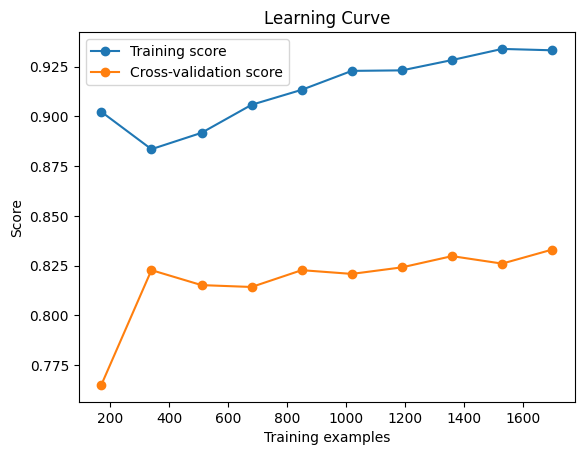

In [10]:
train_sizes, train_scores, test_scores = learning_curve(knn_before, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()

In [11]:
# data set had negative value, using log transform to make positive and Adding 1 in X, to prevent log value as infinite

X_log_transformed = np.log1p(X + 1)

kbest = SelectKBest(score_func=chi2, k=5)
X_new = kbest.fit_transform(X_log_transformed, y)


In [12]:
feature_scores = kbest.scores_
print("Feature Importance Scores:")
print(feature_scores)

Feature Importance Scores:
[2.61919200e-01 1.77368755e-03 1.52940324e-02 5.36050691e-04
 3.95730127e-04 6.56463269e-08 8.59609816e-05 1.68957195e+01
 1.45339333e+01 5.29494011e+02 4.23579355e+01 1.72531418e+01
 3.22287127e+00 1.27957858e-02 5.13797999e+00 5.46795895e-01
 1.72059243e+00 1.58334943e+00 1.05026330e+00 1.21194002e+02
 1.18517227e+01]


## After Normalization

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_normalized = scaler.fit_transform(X)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)


In [15]:
knn_after = KNeighborsClassifier(n_neighbors=4)
knn_after.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=4)

In [16]:
y_pred = knn_after.predict(X_test)


In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Calculating using average micro
print("Accuracy = ", accuracy_score(y_test, y_pred) * 100, "%")
print("Precision = ", precision_score(y_test, y_pred,average='micro'))
print("Recall = ", recall_score(y_test, y_pred,average='micro'))
print("F1-score = ", f1_score(y_test, y_pred,average='micro'))
print("Confusion Matrix = ")
print(confusion_matrix(y_test, y_pred))
print ("********")
# Using classification report too
print("Classification Report")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


Accuracy =  90.61032863849765 %
Precision =  0.9061032863849765
Recall =  0.9061032863849765
F1-score =  0.9061032863849765
Confusion Matrix = 
[[327   5   1]
 [ 23  38   3]
 [  4   4  21]]
********
Classification Report
              precision    recall  f1-score   support

         1.0       0.92      0.98      0.95       333
         2.0       0.81      0.59      0.68        64
         3.0       0.84      0.72      0.78        29

    accuracy                           0.91       426
   macro avg       0.86      0.77      0.80       426
weighted avg       0.90      0.91      0.90       426



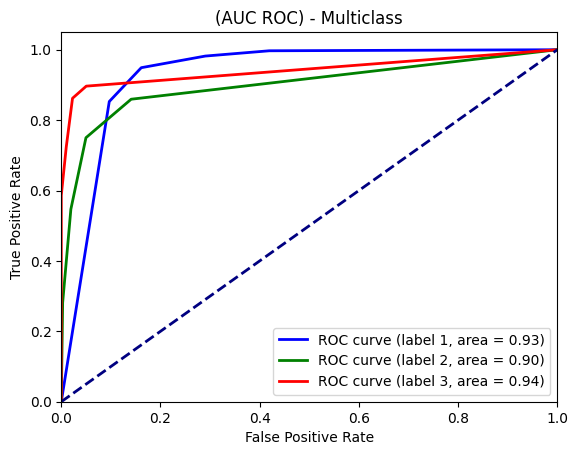

In [18]:
# For multiclass

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_scores = knn_after.predict_proba(X_test)

y_test_binarized = label_binarize(y_test, classes=[1, 2, 3])

plt.figure()

n_classes = 3
colors = ['b', 'g', 'r']

for i in range(1, n_classes + 1):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i - 1], y_scores[:, i - 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i - 1], lw=2, label=f'ROC curve (label {i}, area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(AUC ROC) - Multiclass')
plt.legend(loc="lower right")
plt.show()


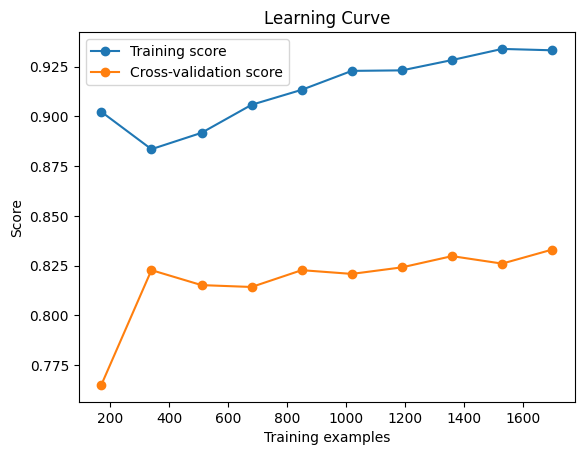

In [19]:
train_sizes, train_scores, test_scores = learning_curve(knn_after, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()

In [20]:
# data set had negative value, using log transform to make positive and Adding 1 in X, to prevent log value as infinite

X_log_transformed = np.log1p(X + 1)

kbest = SelectKBest(score_func=chi2, k=5)
X_new = kbest.fit_transform(X_log_transformed, y)


In [21]:
feature_scores = kbest.scores_
print("Feature Importance Scores:")
print(feature_scores)

Feature Importance Scores:
[2.61919200e-01 1.77368755e-03 1.52940324e-02 5.36050691e-04
 3.95730127e-04 6.56463269e-08 8.59609816e-05 1.68957195e+01
 1.45339333e+01 5.29494011e+02 4.23579355e+01 1.72531418e+01
 3.22287127e+00 1.27957858e-02 5.13797999e+00 5.46795895e-01
 1.72059243e+00 1.58334943e+00 1.05026330e+00 1.21194002e+02
 1.18517227e+01]
